# Modelo para classificação de imagens com o algoritmo SGD, utilizando o dataset "digits":

In [ ]:
# Importando as bibliotecas necessárias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carregando o conjunto de dados Digits (números escritos à mão)
digits = datasets.load_digits()

# extraindo os dados e as labels
X_digits = digits.data
y_digits = digits.target

In [ ]:
# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

print("Número de amostras de treino:", len(X_train))
print("Número de amostras de teste:", len(X_test))

In [ ]:
# Criando o modelo
sgd_classifier = SGDClassifier(max_iter=1000, random_state=42)

# iniciando o processo de treinamento
# A API do sklearn possui uma interface padrão para todos os modelos do framework
# Chamamos a função fit da classe passando como parâmetro os exemplos e os labels
# Podemos customizar os parâmetros da função fit
# Cada algoritmo ou modelo possui parâmetros específicos
# Consulte a API do modelo para descobrir as customizações disponíveis
sgd_classifier.fit(X_train, y_train)

# Utilizamos o predict para fazer predições no conjunto de teste
# Passamos apenas os exemplos sem o rotulo
# Podemos comparar posteriormente as predições geradas com o valor esperado
y_pred = sgd_classifier.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do SGDClassifier no conjunto de teste:", accuracy)

In [ ]:
# Realizando uma predição e visualizando o resultado

# Selecionar uma amostra aleatória do conjunto de teste
sample_index = np.random.randint(0, len(X_test))
sample_image = X_test[sample_index].reshape(8, 8)  # Os dígitos são imagens de 8x8 pixels
true_label = y_test[sample_index]

# Fazer a predição para a amostra selecionada
predicted_label = sgd_classifier.predict([X_test[sample_index]])[0]

# Visualizar a imagem e a predição
plt.imshow(sample_image, cmap='gray')
plt.title(f"Valor real: {true_label}        Previsto pelo modelo: {predicted_label}")
plt.show()

# Validação cruzada do modelo:



In [ ]:
# Realizar a validação cruzada com 5 folds
cross_val_scores = cross_val_score(sgd_classifier, digits.data, digits.target, cv=5, scoring='accuracy')

# Exibir as pontuações de validação cruzada
print("Pontuações de Validação Cruzada:", cross_val_scores)

# Exibir a média e o desvio padrão das pontuações
print(f"Acurácia Média: {np.mean(cross_val_scores):.2f}")
print(f"Desvio Padrão: {np.std(cross_val_scores):.2f}")

# Normalização e encoding(one-hot):



In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Criar um conjunto de dados de exemplo
dados = pd.DataFrame({
    'idade': [25, 30, 35, 40],
    'gênero': ['F', 'M', 'F', 'M'],
    'salário': [50000, 80000, 60000, 70000],
    'classe': ['A', 'B', 'A', 'B']
})

# Dividir os dados em recursos (X) e rótulos (y)
X = dados.drop('classe', axis=1)
y = dados['classe']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Definir as colunas a serem normalizadas e as a serem one-hot encoded
numeric_features = ['idade', 'salário']
categorical_features = ['gênero']

# Criar um transformador para aplicar normalização e one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicar as transformações aos dados
X_transformed = preprocessor.fit_transform(X)

# Exibir coluna por coluna dos dados transformados
print("Dados originais:")
print(X)

# Coluna 1: 'idade' (Normalizada)
print("\nColuna 1 ('idade') após normalização:")
print(X_transformed[:, 0])

# Coluna 2: 'salário' (Normalizada)
print("\nColuna 2 ('salário') após normalização:")
print(X_transformed[:, 1])

# Colunas 3 e 4: 'gênero' (One-hot encoded)
print("\nColunas 3 e 4 ('gênero') após one-hot encoding:")
print(X_transformed[:, 2:])  # A partir da coluna 2 até o final

# Conjunto de dados final:
print("\n Matriz final: \n"+str(X_transformed))

# Observação: A ordem das colunas pode variar dependendo da ordem de aplicação das transformações.

# Regressão Logística:

In [ ]:
# Carregando um conjunto de dados para o exemplo
iris = datasets.load_iris()
X = iris.data[:, :2]  # Vamos usar apenas duas características para facilitar a visualização
y = (iris.target != 0) * 1  # Transformando em um problema de classificação binária

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializando o modelo de regressão logística
model = LogisticRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = np.mean(y_pred == y_test)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

In [ ]:
# Visualizando as fronteiras de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=100, linewidth=1)
plt.title("Regressão Logística - Fronteiras de Decisão")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## MLPClassifier do Sklearn exemplo com classificação categorica de duas classes.

In [ ]:
# Gerando dados de exemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Plotando os dados de treino
plt.figure(figsize=(12, 5))

# Mapeamento das classes para cores
color_map = {0: 'red', 1: 'green'}

# Usando 'c' para fornecer cores diretamente
plt.scatter(X_train[:, 0], X_train[:, 1], c=[color_map[label] for label in y_train])

plt.title('Dados de Treino')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Adicionando a legenda
for class_label, color in color_map.items():
    plt.scatter([], [], c=color, label=f'Classe {class_label}')

plt.legend()
plt.show()

In [ ]:
# Crie o classificador MLP
classificador = MLPClassifier(hidden_layer_sizes=(100,), max_iter=800, random_state=42)

# Treine o classificador
classificador.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = classificador.predict(X_test)

# Avalie a precisão do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia}')

In [ ]:
# Gerar um novo dado de exemplo para previsão
novo_dado = np.random.rand(1, 20)

# Realizar a previsão do novo dado
previsao = classificador.predict(novo_dado)

In [ ]:
# Plotar os dados de treino
plt.figure(figsize=(12, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=[color_map[label] for label in y_train])

# Adicionar o novo dado à plotagem
plt.scatter(novo_dado[:, 0], novo_dado[:, 1], c='black', marker='x', s=100, label='Novo Dado')

plt.title('Dados de Treino com Novo Dado')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Adicionar a legenda
for class_label, color in color_map.items():
    plt.scatter([], [], c=color, label=f'Classe {class_label}')

# Exibir a plotagem
plt.legend()
plt.show()

# Exibir a previsão da classe do novo dado
print(f'Previsão da Classe para o Novo Dado: {previsao[0]}')

## Exercícíos

Replique os resultados deste colab utilizando o dataset lfw do sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people

1 - Escolha 3 modelos de classificação disponível na API do sklearn. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

2 - Carregue o dataset e separe as partições de treino, validação e teste.

3 - Visualize os dados e as classes com base nos rotulos

4 - Realize o processamento dos dados se necessário

5 - Treine os modelos com os dados obtidos

6 - Realize avaliações no conjunto de teste e compare os resultados dos modelos


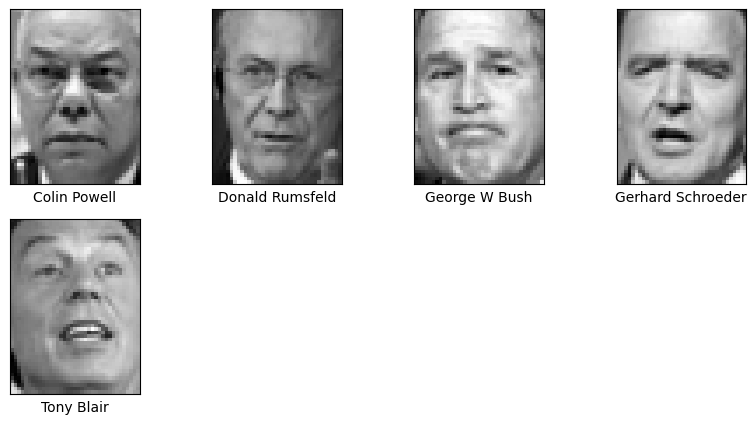

Melhor SVM no conjunto de teste:
                   precision    recall  f1-score   support

     Colin Powell       0.78      0.78      0.78        50
  Donald Rumsfeld       0.80      0.96      0.87        25
    George W Bush       0.92      0.85      0.88       106
Gerhard Schroeder       0.76      0.86      0.81        22
       Tony Blair       0.76      0.76      0.76        25

         accuracy                           0.84       228
        macro avg       0.80      0.84      0.82       228
     weighted avg       0.84      0.84      0.84       228

Melhor pontuação de validação: 0.8333333333333334

Melhor KNN no conjunto de teste:
                   precision    recall  f1-score   support

     Colin Powell       0.89      0.34      0.49        50
  Donald Rumsfeld       1.00      0.20      0.33        25
    George W Bush       0.56      0.97      0.71       106
Gerhard Schroeder       0.75      0.14      0.23        22
       Tony Blair       0.47      0.28      0.35     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Importando as bibliotecas necessárias
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Carregando o dataset LFW
lfw_people = fetch_lfw_people(min_faces_per_person=80, resize=0.4)

# Dividindo os dados em conjuntos de treino, validação e teste (60%, 20%, 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

########################
# Encontrando índices únicos para cada pessoa
unique_targets = np.unique(lfw_people.target)
example_indices = [np.where(lfw_people.target == target)[0][0] for target in unique_targets]

# Calculando o número de classes únicas
n_classes = len(unique_targets)
n_cols = 4
n_rows = (n_classes + n_cols - 1) // n_cols  # Arredonda para cima

# Configurando a figura para visualização das imagens e rótulos
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2.5))
for axi, idx in zip(ax.flat, example_indices):
    axi.imshow(lfw_people.images[idx], cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=lfw_people.target_names[lfw_people.target[idx]])

# Escondendo subplots vazios se houver
for i in range(len(example_indices), n_rows * n_cols):
    ax.flat[i].set_visible(False)

plt.show()

###########################
# Definindo os modelos e as grades de hiperparâmetros
models = {
    "SVM": SVC(kernel='linear', class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

hyperparameters = {
    "SVM": [{'C': 0.1}, {'C': 1}, {'C': 10}],
    "KNN": [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}],
    "Random Forest": [{'n_estimators': 10, 'max_depth': 5},
                      {'n_estimators': 10, 'max_depth': 10},
                      {'n_estimators': 10, 'max_depth': None},
                      {'n_estimators': 50, 'max_depth': 5},
                      {'n_estimators': 50, 'max_depth': 10},
                      {'n_estimators': 50, 'max_depth': None},
                      {'n_estimators': 100, 'max_depth': 5},
                      {'n_estimators': 100, 'max_depth': 10},
                      {'n_estimators': 100, 'max_depth': None}]
}

best_models = {}
best_scores = {}

# Iterando sobre os modelos e suas respectivas grades de hiperparâmetros
# Usando PCA para redução de dimensionalidade para visualização
for model_name, model in models.items():
    best_score = 0
    best_model = None
    for params in hyperparameters[model_name]:
        # Configurando os hiperparâmetros
        model.set_params(**params)
        # Criando o pipeline
        pipeline = make_pipeline(StandardScaler(), PCA(n_components=150, whiten=True), model)
        # Treinamento do modelo no conjunto de treino
        pipeline.fit(X_train, y_train)
        # Avaliação no conjunto de validação
        score = pipeline.score(X_val, y_val)
        if score > best_score:
            best_score = score
            best_model = pipeline
    best_models[model_name] = best_model
    best_scores[model_name] = best_score

# Avaliando os melhores modelos no conjunto de teste
for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    print(f"Melhor {model_name} no conjunto de teste:")
    print(classification_report(y_test, y_test_pred, target_names=lfw_people.target_names))
    print(f"Melhor pontuação de validação: {best_scores[model_name]}\n")
